In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import itemfreq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adjusted = pd.read_csv('./input/prices-split-adjusted.csv')
fundamentals = pd.read_csv('./input/fundamentals.csv', index_col=0)
securities = pd.read_csv('./input/securities.csv')

In [3]:
np.mean(securities.isnull(), axis=0)

Ticker symbol              0.000000
Security                   0.000000
SEC filings                0.000000
GICS Sector                0.000000
GICS Sub Industry          0.000000
Address of Headquarters    0.000000
Date first added           0.392079
CIK                        0.000000
dtype: float64

In [4]:
map(lambda col: securities[col].dtype, securities)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64')]

In [5]:
np.mean(adjusted.isnull(), axis=0)

date      0.0
symbol    0.0
open      0.0
close     0.0
low       0.0
high      0.0
volume    0.0
dtype: float64

In [8]:
np.mean(fundamentals.isnull(), axis=0).sort_values(ascending=False)

Cash Ratio                                             0.167883
Quick Ratio                                            0.167883
Current Ratio                                          0.167883
Estimated Shares Outstanding                           0.122965
Earnings Per Share                                     0.122965
For Year                                               0.097136
Accounts Receivable                                    0.000000
Equity Earnings/Loss Unconsolidated Subsidiary         0.000000
Goodwill                                               0.000000
Gross Margin                                           0.000000
Gross Profit                                           0.000000
Income Tax                                             0.000000
Intangible Assets                                      0.000000
Interest Expense                                       0.000000
Inventory                                              0.000000
Investments                             

In [9]:
url ='https://graderdata.s3.amazonaws.com/prices-split-adjusted.txt'
adjusted = pd.read_csv(url, parse_dates= [0])

In [10]:
map(lambda col: adjusted[col].dtype, adjusted)

[dtype('<M8[ns]'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')]

In [29]:
fundamentals.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [32]:
tmp = pd.merge(
    securities[['Ticker symbol', 'GICS Sector']],
    fundamentals,
    how = 'inner',
    left_on = 'Ticker symbol',
    right_on = 'Ticker Symbol')

In [74]:
col='Total Equity'
tmp.groupby('GICS Sector').agg({col: lambda x: np.round(np.mean(x))}).sort_values(col)[col].apply(lambda x: "{:,}".format(x))

GICS Sector
Real Estate                     5,235,093,315.0
Consumer Discretionary          5,625,190,361.0
Materials                       5,810,683,253.0
Industrials                     5,965,306,944.0
Consumer Staples                8,943,538,114.0
Health Care                     9,068,469,186.0
Utilities                      11,934,415,479.0
Information Technology         12,563,978,084.0
Energy                         21,829,732,266.0
Telecommunications Services    29,926,253,850.0
Financials                     30,475,685,313.0
Name: Total Equity, dtype: object

In [75]:
col='Accounts Payable'
tmp.groupby('GICS Sector').agg({col: lambda x: np.round(np.mean(x))}).sort_values(col)[col].apply(lambda x: "{:,}".format(x))

GICS Sector
Real Estate                       624,717,407.0
Utilities                       1,698,103,094.0
Materials                       2,128,060,474.0
Information Technology          3,308,296,709.0
Consumer Discretionary          3,500,750,231.0
Industrials                     3,621,331,347.0
Health Care                     4,043,224,149.0
Energy                          5,250,199,508.0
Consumer Staples                5,659,070,417.0
Telecommunications Services    10,908,116,850.0
Financials                     12,804,457,242.0
Name: Accounts Payable, dtype: object

In [76]:
col= 'Accounts Receivable'
tmp.groupby('GICS Sector').agg({col: lambda x: np.round(np.mean(x))}).sort_values(col)[col].apply(lambda x: "{:,}".format(x))

GICS Sector
Telecommunications Services    -641,509,350.0
Health Care                    -243,303,082.0
Consumer Discretionary         -121,640,383.0
Information Technology          -78,764,295.0
Industrials                     -54,737,444.0
Materials                       -31,151,832.0
Consumer Staples                -22,857,667.0
Real Estate                     -18,026,370.0
Utilities                       -17,987,177.0
Financials                        9,406,858.0
Energy                          203,396,952.0
Name: Accounts Receivable, dtype: object

In [78]:
col= 'Pre-Tax ROE'
tmp.groupby('GICS Sector').agg({col: lambda x: np.round(np.mean(x))}).sort_values(col)[col].apply(lambda x: "{:,}".format(x))

GICS Sector
Real Estate                      9.0
Utilities                       15.0
Telecommunications Services     28.0
Materials                       32.0
Health Care                     40.0
Financials                      42.0
Energy                          47.0
Information Technology          47.0
Industrials                     77.0
Consumer Discretionary          83.0
Consumer Staples               158.0
Name: Pre-Tax ROE, dtype: object

In [85]:
col = 'After Tax ROE'
tmp.groupby('GICS Sector').agg({col: lambda x: np.round(np.mean(x), 2)}).sort_values(col)[col]
#.apply(lambda x: "{:,}".format(x))

GICS Sector
Utilities                        9.53
Real Estate                     11.16
Telecommunications Services     18.70
Materials                       24.34
Financials                      29.15
Health Care                     31.13
Energy                          33.44
Information Technology          37.51
Industrials                     54.42
Consumer Discretionary          57.66
Consumer Staples               120.51
Name: After Tax ROE, dtype: float64

In [87]:
col = 'Inventory'
tmp.groupby('GICS Sector').agg({col: lambda x: np.round(np.mean(x), 2)}).sort_values(col)[col].apply(lambda x: "{:,}".format(x))

GICS Sector
Real Estate                        20,703,703.7
Financials                        33,788,203.79
Telecommunications Services       225,000,000.0
Information Technology           677,477,936.71
Utilities                        827,395,593.75
Health Care                     1,596,898,500.0
Materials                      1,695,822,105.26
Energy                         1,798,810,830.65
Industrials                    1,942,793,189.52
Consumer Discretionary         2,147,112,177.22
Consumer Staples               3,825,007,878.79
Name: Inventory, dtype: object

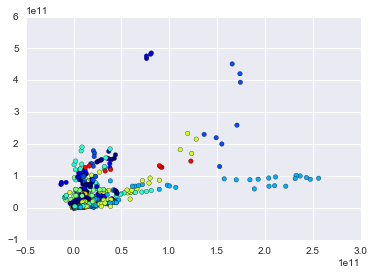

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline


# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)


color = np.argmax(np.array(pd.get_dummies(tmp['GICS Sector'])), axis=1)
color = map(lambda x: str(x), color)
plt.scatter(tmp['Total Equity'], 
            tmp['Total Revenue'],
            c = color, cmap=cmap)